In [0]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# PCA

In [15]:
data_pulsar.head() ##Visualización de los datos

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
#Escalamiento 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_pulsar)
head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns = head)

X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

In [0]:
#Split de los datos
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

In [18]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
pca_cargas = pca.components_
pca_cargas

array([[ 4.11241251e-02,  2.02174246e-03, -2.41556652e-03,
        -1.33698538e-02, -1.11683957e-01, -1.12424819e-01,
         3.94725095e-02,  9.85621330e-01],
       [-4.76199607e-01, -4.56193590e-02,  2.08171523e-02,
         1.10708854e-01,  7.65766930e-01,  3.83582585e-01,
        -3.68888011e-02,  1.53517524e-01],
       [ 8.45024779e-01,  1.66859669e-01, -2.69975473e-02,
        -1.25579042e-01,  4.53650247e-01,  1.84667926e-01,
        -2.00562992e-02,  3.59021711e-02],
       [-4.78656973e-02,  4.26082592e-02, -4.83890692e-03,
        -2.32475536e-02,  4.37104978e-01, -8.93628352e-01,
         5.37684956e-02, -5.29726586e-02],
       [-2.13069665e-01,  9.16985871e-01, -2.53050854e-02,
        -3.30258921e-01, -4.96211824e-02,  3.91936921e-02,
        -5.11961535e-03,  1.52015020e-03],
       [ 9.74977478e-02,  3.56659498e-01,  1.08624424e-01,
         9.21245086e-01, -3.87279550e-02, -3.26539237e-02,
        -1.51682366e-02,  4.57624063e-04],
       [-5.78170873e-04, -9.513539

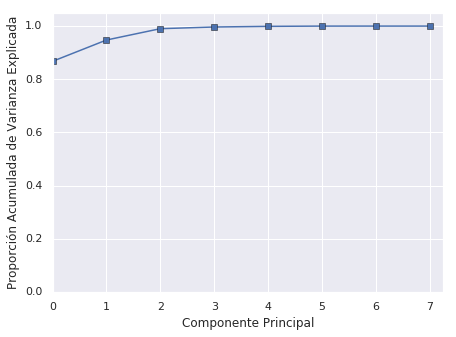

In [19]:
# Se obtiene la grafica de la PVE para los 8 componentes principales
plt.figure(figsize=(7,5))
plt.plot(range(0,8),np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0,7.25)
plt.ylim(0,1.05)
plt.xticks(range(0,8,1))
plt.show()

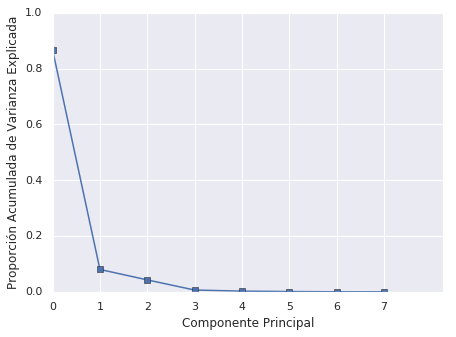

In [20]:
plt.figure(figsize=(7,5))
plt.plot(range(0,8),pca.explained_variance_ratio_, '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,8.25)
plt.ylim(0,1)
plt.xticks(range(0,8,1))
plt.show()

In [21]:
#Del analisis solo nos quedamos con los pesos que nos dan las 3 componentes principales
pesos_nuevo_espacio = pca_cargas[0:3]
pesos_nuevo_espacio

array([[ 0.04112413,  0.00202174, -0.00241557, -0.01336985, -0.11168396,
        -0.11242482,  0.03947251,  0.98562133],
       [-0.47619961, -0.04561936,  0.02081715,  0.11070885,  0.76576693,
         0.38358258, -0.0368888 ,  0.15351752],
       [ 0.84502478,  0.16685967, -0.02699755, -0.12557904,  0.45365025,
         0.18466793, -0.0200563 ,  0.03590217]])

In [28]:
Z_train_npa = pca.transform(X_train)[:,:3]
Z_train =pd.DataFrame(Z_train_npa)
Z_train.head()

,0,1,2
0,54.440826,-11.825550,8.178276
1,60.837862,-3.814422,-6.067730
2,21.003795,-20.171298,12.408113
3,-69.813435,-23.498930,8.154935
4,-9.918176,-11.688642,-9.193454


# CLASIFICACION DATA CON MENOS CARACTERISTICAS


## Algoritmo: Redes Neuronales por defecto

Error MSE:  0.02867707477403451


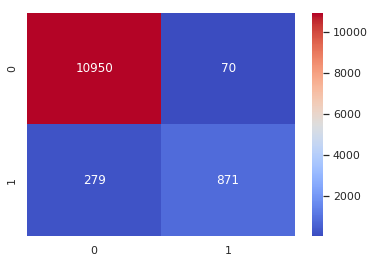

In [29]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()

NN_model.fit(Z_train, y_train) 
y_train_predict= NN_model.predict(Z_train)

from sklearn.metrics import mean_squared_error
NN_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",NN_model_mse)

from sklearn.metrics import confusion_matrix
NN_model_cm = confusion_matrix(y_train, y_train_predict)   

sns.heatmap(NN_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9713229252259655
precision 0.9256110520722636
recall 0.7573913043478261
f1score 0.8330942132950742


### Evaluación con data de test

In [32]:
Z_test_npa = pca.transform(X_test)[:,:3]
Z_test =pd.DataFrame(Z_test_npa)
Z_test.head()

,0,1,2
0,15.207046,-6.824184,-13.955161
1,-27.627115,-19.398899,2.111310
2,-7.222189,-11.570715,-5.887185
3,118.162269,-9.595034,19.273077
4,264.911386,33.544585,-14.732541


Error MSE:  0.02309124767225326


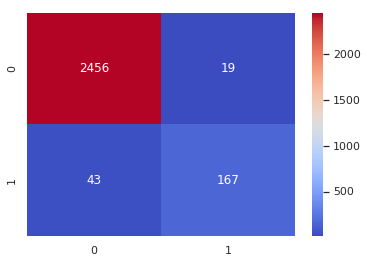

In [33]:
y_test_predict= NN_model.predict(Z_test)

NN_model_mse_test = mean_squared_error(y_test, y_test_predict)  
print("Error MSE: ",NN_model_mse_test)

NN_model_cm_test = confusion_matrix(y_test, y_test_predict) 

sns.heatmap(NN_model_cm_test,annot=True, fmt="d", cmap="coolwarm");

In [34]:
ccuracy = accuracy_score(y_test, y_test_predict)
precision = precision_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
f1score = f1_score(y_test, y_test_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9713229252259655
precision 0.8978494623655914
recall 0.7952380952380952
f1score 0.8434343434343434


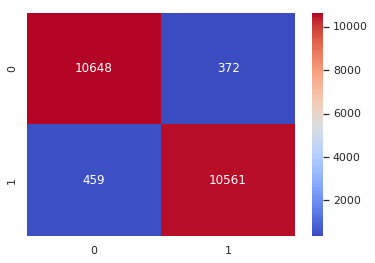

In [0]:
NN_model2_cm = confusion_matrix(y_sm_train, y_sm_train_predict)  
sns.heatmap(NN_model2_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_sm_train, y_sm_train_predict) 
precision = precision_score(y_sm_train, y_sm_train_predict)
recall = recall_score(y_sm_train, y_sm_train_predict)
f1score = f1_score(y_sm_train, y_sm_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9622958257713249
precision 0.9659745723954999
recall 0.9583484573502722
f1score 0.9621464036805903


In [0]:
y_test_predict= NN_model2.predict(X_test_sca)
NN_model2_mse_test = mean_squared_error(y_test_sca, y_test_predict) 
print("Error MSE: ",NN_model2_mse_test)

Error MSE:  0.03836126629422719


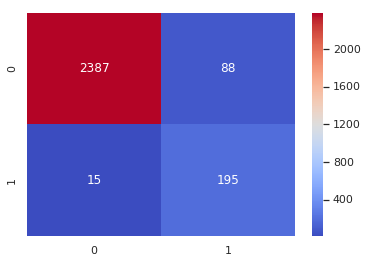

In [0]:
NN_model2_cm_test = confusion_matrix(y_test_sca, y_test_predict)   
sns.heatmap(NN_model2_cm_test,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_test_sca, y_test_predict) 
precision = precision_score(y_test_sca, y_test_predict) 
recall = recall_score(y_test_sca, y_test_predict) 
f1score = f1_score(y_test_sca, y_test_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9616387337057728
precision 0.6890459363957597
recall 0.9285714285714286
f1score 0.7910750507099392
